In [1]:
options(warn = -1)
library(engsoccerdata)
library(ggplot2)
library(hash)

The `maketable()` function in the `engsoccerdata` package generates the order of the final table for the specified year.

In [2]:
epl.final.tables  <- data.frame()

# Iterate over all EPL seasons (the dataset ends at 2016)
for(year in 1992:2016) {
  current.table  <- maketable(df = england, Season = year, tier = "1")
  current.table$Season  <- rep(year, nrow(current.table))
  epl.final.tables  <- rbind(epl.final.tables, current.table)
}

summary(epl.final.tables)

     team                 GP              W               D        
 Length:506         Min.   :38.00   Min.   : 1.00   Min.   : 3.00  
 Class :character   1st Qu.:38.00   1st Qu.:10.00   1st Qu.: 8.00  
 Mode  :character   Median :38.00   Median :13.00   Median :10.00  
                    Mean   :38.52   Mean   :14.17   Mean   :10.19  
                    3rd Qu.:38.00   3rd Qu.:17.00   3rd Qu.:12.00  
                    Max.   :42.00   Max.   :30.00   Max.   :18.00  
       L               gf               ga               gd     
 Min.   : 0.00   Min.   : 20.00   Min.   : 15.00   Min.   :-69  
 1st Qu.:10.00   1st Qu.: 41.00   1st Qu.: 43.00   1st Qu.:-16  
 Median :15.00   Median : 48.00   Median : 51.00   Median : -5  
 Mean   :14.17   Mean   : 50.93   Mean   : 50.93   Mean   :  0  
 3rd Qu.:18.00   3rd Qu.: 59.00   3rd Qu.: 59.00   3rd Qu.: 15  
 Max.   :29.00   Max.   :103.00   Max.   :100.00   Max.   : 71  
      Pts            Pos                Season    
 Min.   :11.00   L

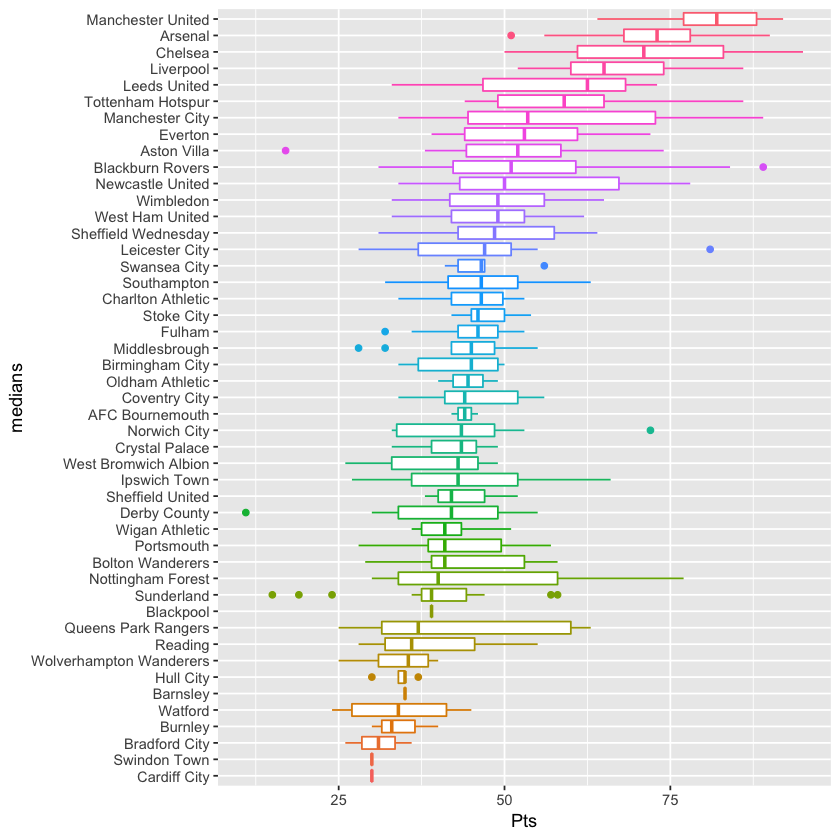

In [3]:
# Create a hash lookup table of each team's median points, so that the final plot can be ordered
# by this value from largets to smallest.
plot.order <- hash()
for(teamname in sort(unique(epl.final.tables$team))) {
  team.points.median <- median(with(epl.final.tables, epl.final.tables[team == teamname,])$Pts)
  plot.order[teamname] <- team.points.median
}
epl.final.tables$medians <- factor(epl.final.tables$team, levels=names(sort(values(plot.order))))

ggplot(data=epl.final.tables, aes(x=medians, y=Pts)) +
    geom_boxplot(aes(color=medians)) + 
    theme(legend.position = "none") +
    coord_flip()